In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [43]:
# Loading dataset 

df = pd.read_csv('downloads/electricity+consumption/powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [44]:
# Checking for data and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [45]:
#Changing date column to a time series
df['Datetime'] = pd.to_datetime(df['Datetime'])



In [46]:
#Creating new columns out of the date time column

df['Hour'] = df['Datetime'].dt.hour
df['Month'] = df['Datetime'].dt.month_name()
df['Week Day'] = df['Datetime'].dt.day_name()

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Month,Week Day
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,January,Sunday
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,January,Sunday
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,January,Sunday
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,January,Sunday
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,January,Sunday


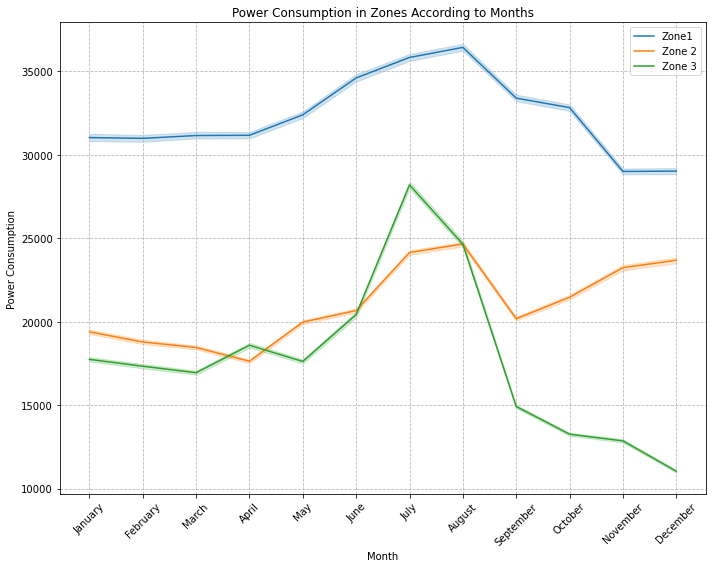

In [47]:


# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Month', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption in Zones According to Months')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45)


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()


Based on the graph, the highest power consumption occurred predominantly in August for Zones 1 and 2, while Zone 3 saw its peak in July. Conversely, the lowest power utilization was observed in November and December for Zone 1, April for Zone 2, and December for Zone 3.

Moreover, the graph illustrates that Zone 1 exhibited the highest power consumption, ranging between 30,000 to 35,000 kWh, followed by Zone 2, with consumption levels ranging from 18,000 to 24,000 kWh. Zone 3 registered the lowest consumption, ranging from 12,000 to 26,000 kWh.

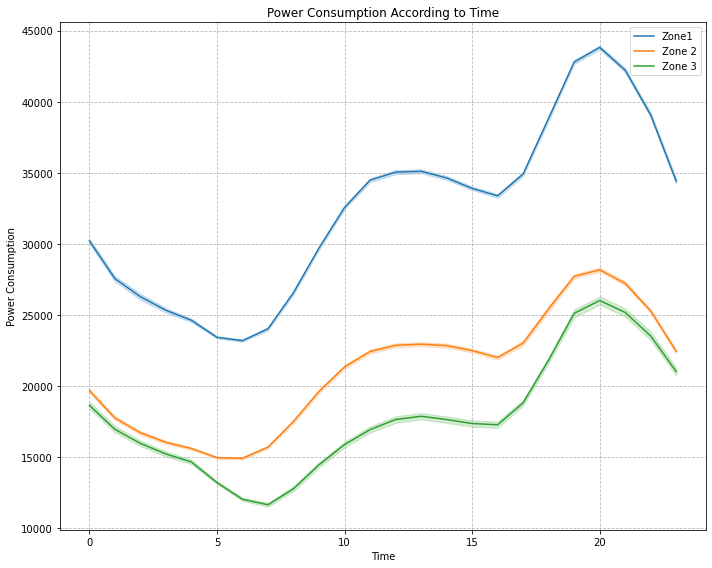

In [48]:
# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Hour', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption According to Time')
plt.xlabel('Time')
plt.ylabel('Power Consumption')


# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()

As per the data presented in the graph, the peak consumption of power consistently occurs at 20:00 hours, while the lowest usage is consistently observed between 5:00 and 7:00 in the morning across all zones.

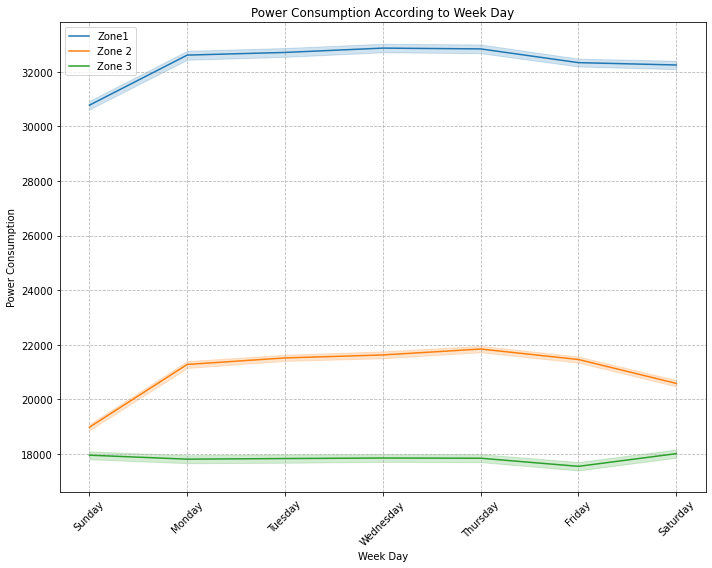

In [49]:
# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Create the line plot
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone1', label= 'Zone1')
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone2',label='Zone 2')
sns.lineplot(data=df, x='Week Day', y='PowerConsumption_Zone3', label='Zone 3')

# Set title and labels
plt.title('Power Consumption According to Week Day')
plt.xlabel('Week Day')
plt.ylabel('Power Consumption')
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.9)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the graph, the data indicates that power consumption is at its lowest on Sundays in Zone 1 and Zone 2, while in Zone 3, the lowest consumption occurs on Fridays. Throughout the weekdays (Monday to Thursday), power usage remains relatively consistent in Zones 1 and 2, with Zone 1 consuming approximately 33,000 kWh and Zone 2 consuming around 22,000 kWh. In contrast, Zone 3 maintains a lower consumption level of approximately 18,000 kWh during the weekdays.

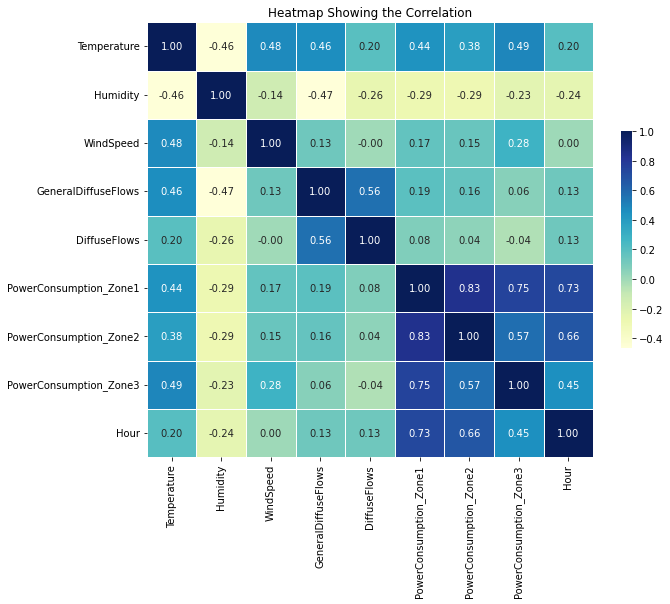

In [50]:
# Increase the size of the heatmap
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed

corr =df.corr()
# Create the heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Set labels and title if needed

plt.title("Heatmap Showing the Correlation")

# Show the plot
plt.show()



The heatmap above reveals strong positive correlations between Power Consumption in Zone 1 and Zone 2, standing at 0.83, and between Power Consumption in Zone 1 and Zone 3, registering at 0.75. However, the correlation between Zone 2 and Zone 3 is notably lower, at 0.57.

When considering the relationship between temperature and power consumption, the correlations are relatively weak across all zones. Notably, Zone 3 exhibits the highest correlation at 0.49. Conversely, there appears to be minimal positive correlation between windspeed and power consumption, with Zone 3 demonstrating the highest correlation coefficient at 0.28.

Furthermore, there exists a modest negative correlation between humidity and power consumption, ranging from -0.29 to -0.23 across the zones.

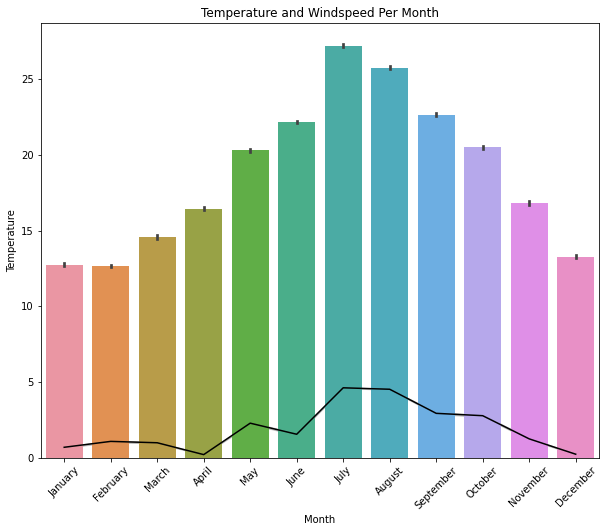

In [52]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='Month',y='WindSpeed',color='black')

sns.barplot(data=df,x='Month',y='Temperature')
plt.xticks(rotation=45)
plt.title("Temperature and Windspeed Per Month")
plt.show()


Taking a look at the bar chart, we see a clear trend for both temperature and wind speed.  Temperatures soared in the summer months, with July reaching the peak at around 28 degrees Celsius.  June wasn't far behind, with temperatures hovering around 25 degrees.  Interestingly, wind speed followed a similar pattern, with both June and July experiencing the highest wind speeds of approximately 5 m/s (or mph).  On the other hand, winter brought a dip in both categories.  The coldest months were January, February, and December, while January, April, and December saw the lowest wind speeds.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor



In [71]:
#splitting the data

X = df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]


In [72]:
# Train_test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)


In [73]:
#importing scaler & ohe for preprocessing 

from sklearn.preprocessing import StandardScaler,OneHotEncoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

#defining numerical and categorical features

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [74]:
#Creating pipelines
numeric_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

#define Tuples for column transformers
number_tuple = (numeric_pipe,num_selector)
category_tuple = (cat_pipe,cat_selector)

#making column transformers
preprocessor = make_column_transformer(number_tuple,category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feea5a2ca90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feea5a2ce50>)])

In [84]:
# Preprocessing training and testing data separately
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)  # Using fitted transformer on test data

# Creating and training the model
rf = RandomForestRegressor(random_state=3,max_depth = 30)
rf.fit(X_train_preprocessed, y_train)

# Making predictions on test data
y_pred = rf.predict(X_test_preprocessed)

# Evaluating model performance using r2 score
from sklearn.metrics import r2_score
r2_scores = []
for i in range(y.shape[1]):
  r2_scores.append(r2_score(y_test.iloc[:, i], y_pred[:, i]))

print(f"R-squared scores for each target:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
  print(f"{zone}: {r2_scores[i]}")


R-squared scores for each target:
Zone 1: 0.9783376449556106
Zone 2: 0.9782374612340977
Zone 3: 0.9862713232945302


In [85]:
# Calculating baseline predictions (average for each zone)
baseline_y_pred = np.zeros_like(y_test)  # Create an empty array to store predictions
for i in range(y.shape[1]):
  baseline_y_pred[:, i] = y_train.iloc[:, i].mean()  # Fill with mean value of each target in training data

# Calculating R-squared for baseline
from sklearn.metrics import r2_score
baseline_r2_scores = []
for i in range(y.shape[1]):
  baseline_r2_scores.append(r2_score(y_test.iloc[:, i], baseline_y_pred[:, i]))

print(f"\nR-squared scores for baseline:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
  print(f"{zone}: {baseline_r2_scores[i]}")

# Comparing R-squared scores with your model
print("\nComparison with Model R-squared:")
for i, zone in enumerate(['Zone 1', 'Zone 2', 'Zone 3']):
  print(f"{zone}: Model - {r2_scores[i]:.4f}, Baseline - {baseline_r2_scores[i]:.4f}")



R-squared scores for baseline:
Zone 1: -0.0002614002391956305
Zone 2: -0.00016869567361910143
Zone 3: -0.00026087444041578145

Comparison with Model R-squared:
Zone 1: Model - 0.9783, Baseline - -0.0003
Zone 2: Model - 0.9782, Baseline - -0.0002
Zone 3: Model - 0.9863, Baseline - -0.0003


In [110]:
# Adding predictions to a DataFrame
predicted_df = y_test.copy()  # Copy the target test DataFrame
predicted_df.columns = ['Actual_Zone1', 'Actual_Zone2', 'Actual_Zone3']  
for i in range(y.shape[1]):
  predicted_df[f'Predicted_Zone{i+1}'] = y_pred[:, i]  # Adding predicted values for each zone

predicted_df.head()


,Actual_Zone1,Actual_Zone2,Actual_Zone3,Predicted_Zone1,Predicted_Zone2,Predicted_Zone3
47635,39987.69231,33898.760330,16568.67470,39734.953845,33537.012398,16778.428917
10244,22745.87234,13243.902440,14591.61290,22913.099234,13250.305793,14575.954354
11882,32917.78723,22371.951220,16420.64516,33126.424223,21845.363465,16232.994170
13148,20745.92034,9307.942974,11415.27273,20725.523934,9671.263540,11262.475419
45188,38855.38462,31916.528930,18020.24096,38656.000000,32161.053718,17943.787951


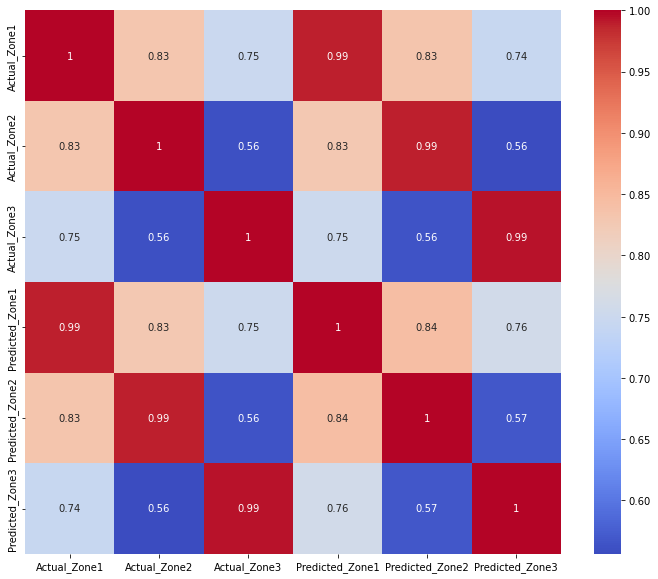

In [144]:
plt.figure(figsize=(12,10))
sns.heatmap(predicted_df.corr(), annot=True, cmap='coolwarm')
plt.show()


The heatmap reveals a fascinating story about how well the model predicted power consumption for each zone. The strongest positive correlation (0.99) exists between actual and predicted values for all zones. This indicates an almost perfect match between the model's predictions and the actual consumption.

Zone 2 also shows a strong positive correlation (0.83) with its predicted values in Zone 1.  

Moving on, the correlation between Zone 3's actual consumption and the predicted values for Zone 1 remains positive (0.75).

Finally, the heatmap shows the weakest positive correlation (0.56) between Zone 2's actual consumption and the predicted values for Zone 3.

In simpler terms, the model performed best in predicting power consumption for Zone 1, followed by Zone 2, and then Zone 3. The correlation between Zone 2 and Zone 3 predictions was the least significant.

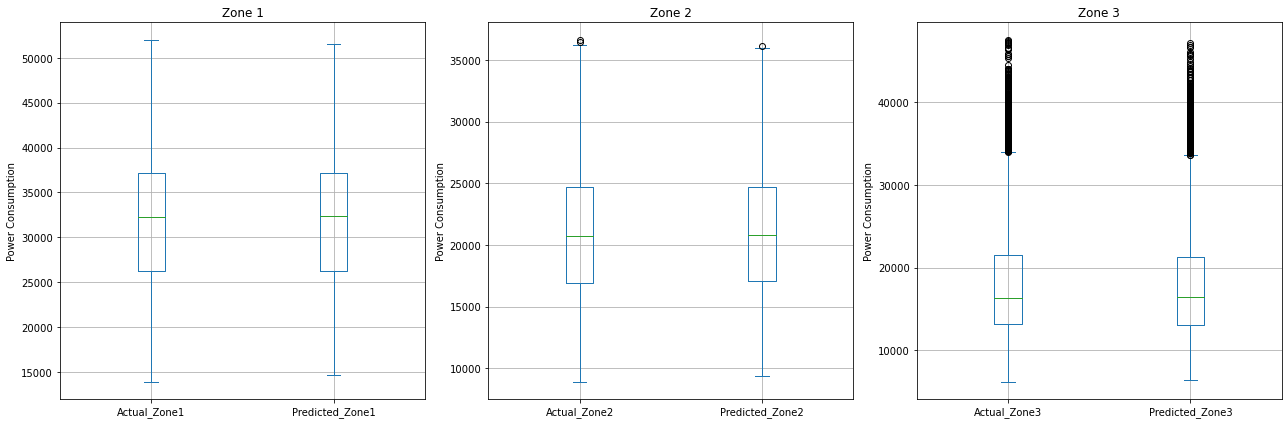

In [125]:
# Create subplots for the box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 'Actual_Zone1' box plot
predicted_df[['Actual_Zone1', 'Predicted_Zone1']].plot(kind='box', ax=axes[0])
axes[0].set_ylabel('Power Consumption')
axes[0].set_title('Zone 1')
axes[0].grid(True)

# Plot 'Actual_Zone2' box plot
predicted_df[['Actual_Zone2', 'Predicted_Zone2']].plot(kind='box', ax=axes[1])
axes[1].set_ylabel('Power Consumption')
axes[1].set_title('Zone 2')
axes[1].grid(True)

# Plot 'Actual_Zone3' box plot
predicted_df[['Actual_Zone3', 'Predicted_Zone3']].plot(kind='box', ax=axes[2])
axes[2].set_ylabel('Power Consumption')
axes[2].set_title('Zone 3')
axes[2].grid(True)

plt.tight_layout()
plt.show()


The spread of the data seems to be similar for both actual and predicted values, as indicated by the similar sizes of the boxes.
The median of the predicted power consumption (green line) is closer to the median of the actual power consumption compared to the top and bottom of the boxes. This suggests that the model's predictions tend to be centered around the actual values.